# Hard Work Pays Off
In this Project we are going to implement Linear Regression over a dataset in which the Study time and Performance of students are given as per a survey. We need to create a model based on linear regression to predict most accurate future performance if the study time of a student is given as input.

#### Importing Essential Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

### Data Preparation

#### Loading Training Data using Pandas

In [2]:
x = pd.read_csv("./Training Data/Linear_X_Train.csv")
y = pd.read_csv("./Training Data/Linear_Y_Train.csv")

x.head()

,x
0,-0.289307
1,-0.588810
2,1.027507
3,-0.259013
4,0.782043


In [3]:
y.head()

,y
0,-0.091101
1,-53.467721
2,75.457009
3,-12.025286
4,57.414187


#### Visualizing Our Training Data

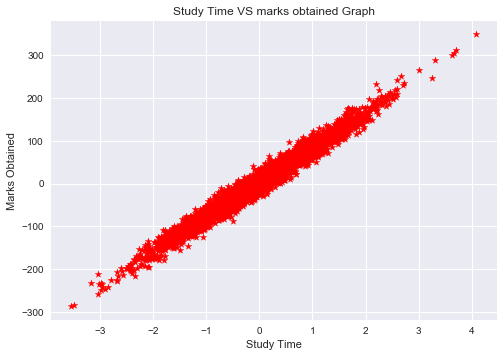

In [4]:
plt.style.use("seaborn")
plt.scatter(x,y, color = "red", marker = '*')
plt.xlabel("Study Time")
plt.ylabel("Marks Obtained")
plt.title("Study Time VS marks obtained Graph")
plt.show()

In [5]:
# Lets look what is the shape of our X training Data and Y training Data
print(x.shape)
print(y.shape)

# Both shapes must be equal

(3750, 1)
(3750, 1)


In [6]:
# Datatypes of X and Y training Data
type(x)

pandas.core.frame.DataFrame

In [7]:
# Since both the data is in the form of Pandas Dataframe
# Now we can convert x,y to numpy array by .values method

X = x.values
Y = y.values
print(X)

[[-0.28930742]
 [-0.58880963]
 [ 1.02750749]
 ...
 [-0.30516366]
 [ 1.67583291]
 [-0.49175724]]


In [8]:
print(Y)

[[-9.11011171e-02]
 [-5.34677208e+01]
 [ 7.54570088e+01]
 ...
 [-3.49832749e+01]
 [ 1.45206092e+02]
 [-1.71244939e+01]]


#### Normalisation

In [9]:
# we always normalise X values only
# xi = (xi - mean)/standard_deviation

In [10]:
u = X.mean()
std = X.std()

print(u, "\n", std)

-0.03779466168006855 
 0.9920801322508517


In [11]:
# We can observe in our scatter plot that our mean lies over 0 and standard_deviation is of 1 unit. 
# And by calculating the mean and standard deviation our result is approximately same.
# thus our data is already normalized

In [12]:
X = (X- u)/std

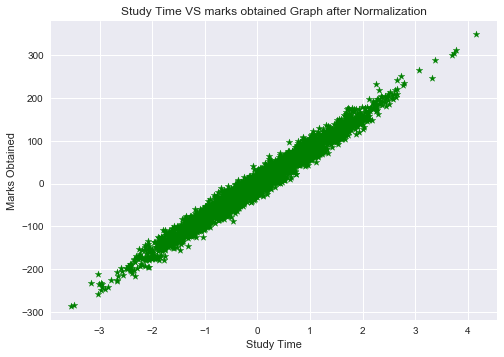

In [13]:
plt.style.use("seaborn")
plt.scatter(X,Y, color = "green", marker = '*')
plt.xlabel("Study Time")
plt.ylabel("Marks Obtained")
plt.title("Study Time VS marks obtained Graph after Normalization")
plt.show()

### Linear Regression Implementation

In [14]:
def hypothesis(x, theta):
    # theta = [theta0 , thete1]
    y_hat = theta[0] + x*theta[1] # x denotes the particular element of X
    
    return y_hat

In [15]:
print(X.shape) # 2D array
print(X.shape[0]) # determines the number of rows of 2D array 

(3750, 1)
3750


In [16]:
def gradient(X, Y, theta): # Entire X and Y array
    m = X.shape[0]
    grad = np.zeros((2,)) # vector of 2 zeroes
    for i in range(m):
        y_hat = hypothesis(X[i], theta)
        x = X[i]
        y = Y[i]
        grad[0] += (y_hat - y)
        grad[1] += (y_hat - y)*x
    
    return grad/m


In [17]:
def gradient_descent(X, Y, max_steps = 100, learning_rate = 0.1):
    
    # learning_rate is the hyper parameter we have to check which value is best for the model
    theta = np.zeros((2,))
    error_list = []
    
    for i in range(max_steps):
        
        # compute gradient each time
        grad = gradient(X, Y, theta)
        e = error(X,Y, theta)
        error_list.append(e)
        
        # update theta
        theta[0] = theta[0] - learning_rate*grad[0]
        theta[1] = theta[1] - learning_rate*grad[1]
    
    return theta, error_list


In [18]:
# Error Function

def error(X, Y, theta):
    m = X.shape[0]
    total_error = 0.0
    for i in range(m):
        y_hat = hypothesis(X[i], theta)
        y = Y[i]
        total_error += (y_hat - y)**2
        
    return total_error/m # returns the avarage error of a line respective to all data points
        

In [19]:
# calling the functions
theta, error_list = gradient_descent(X,Y)


In [20]:
print("Value of theta is ", theta)
error_list


Value of theta is  [ 0.6838508  79.90361453]


[array([6576.35005246]),
 array([5363.12510257]),
 array([4380.41289317]),
 array([3584.41600355]),
 array([2939.65852295]),
 array([2417.40496367]),
 array([1994.37958066]),
 array([1651.72902041]),
 array([1374.18206661]),
 array([1149.36903404]),
 array([967.27047765]),
 array([819.77064698]),
 array([700.29578413]),
 array([603.52114523]),
 array([525.13368772]),
 array([461.63984713]),
 array([410.20983626]),
 array([368.55152745]),
 array([334.80829731]),
 array([307.47628091]),
 array([285.33734761]),
 array([267.40481165]),
 array([252.87945752]),
 array([241.11392067]),
 array([231.58383582]),
 array([223.8644671]),
 array([217.61177843]),
 array([212.54710061]),
 array([208.44471157]),
 array([205.12177646]),
 array([202.43019901]),
 array([200.25002128]),
 array([198.48407732]),
 array([197.05366271]),
 array([195.89502687]),
 array([194.95653185]),
 array([194.19635088]),
 array([193.58060429]),
 array([193.08184956]),
 array([192.67785822]),
 array([192.35062524]),
 array(

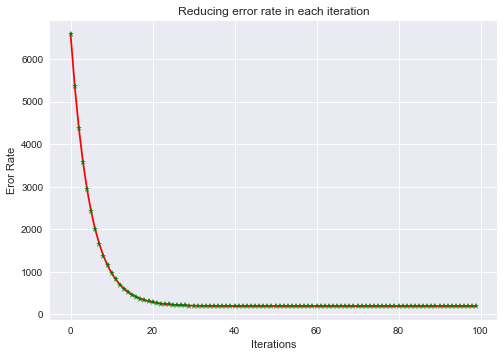

In [21]:
plt.title("Reducing error rate in each iteration")
plt.xlabel("Iterations")
plt.ylabel("Eror Rate")
plt.plot(error_list, color = "red", marker = '*', markerfacecolor = 'green')
plt.show()

### Prediction of Testing Data and Visualization of Best Line

In [22]:
# Regression Line can be drawn using X value and prediction Y for those using hypothesis function which will draw a linear line
# Predicted value of X array

y_pred = hypothesis(X, theta)

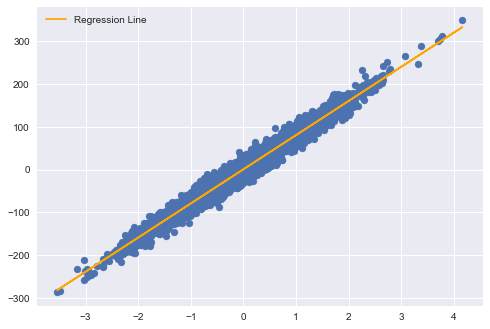

In [23]:
plt.scatter(X, Y)
plt.plot(X, y_pred, color = "orange", label = "Regression Line")
plt.legend()
plt.show()

### Predicting the Test Data

In [24]:
# load the test data
x_test = pd.read_csv("./Test Cases/Linear_X_Test.csv")
x_test = x_test.values

# predicting the y_test values for given x_test array
y_test = hypothesis(x_test, theta)

In [25]:
print(y_test)

[[-149.37069577]
 [ -68.75494042]
 [-201.48687035]
 ...
 [  10.9121384 ]
 [ -21.53235759]
 [ -53.68460035]]


In [26]:
y_test.shape

(1250, 1)

In [27]:
# creating a dataframe for converting y_test array to a csv file

df = pd.DataFrame(data = y_test, columns = ['y'])

In [31]:
df.to_csv("y_prediction.csv", index = False) # This file is the predicted value of x_test

### Computing Score
**R2 (R-Squared) OR coefficient of Determination**

In [29]:
# Generally r2_score is calculated between y_test label and predicted value of x_test over test data
# Finding r2 score over training Data

def r2_score(Y,y_hat):
    
    num = np.sum((Y - y_hat)**2)
    denom = np.sum((Y - y_hat.mean())**2)
    
    score = (1 - num/denom)
    
    return score*100

In [30]:
r2_score(y,y_pred)
# y = y_train and y_pred = predicted y label for x_train wrt to final theta[0] and theta[1]

y    97.096122
dtype: float64

** We got 97% of r2-score over our training data **